<a href="https://colab.research.google.com/github/vjbAvanzi/Group12_AppStat2021/blob/main/pendulum_Clear'n'working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [ ]:
!pip install iminuit

     |████████████████████████████████| 334 kB 7.9 MB/s 


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from iminuit import Minuit
from scipy import stats

In [ ]:
# Import ExternalFunctions from the github repo.
# Save ExternalFunctions as a local file
# Import functions as usual
# This ensure that the code will run in any directory on any system that we could possibly use (e.g. google colab)

import requests

url = 'https://raw.githubusercontent.com/AppliedStatisticsNBI/AppStat2021/main/External_Functions/ExternalFunctions.py'
with open('{}.py'.format('ExternalFunctions'), 'w') as file:
    file.write(requests.get(url).text)

from ExternalFunctions import Chi2Regression

In [155]:
# Load data from github
from urllib.request import urlopen

order_url=1
testurls = ['https://raw.githubusercontent.com/vjbAvanzi/Group12_AppStat2021/main/Pendulum/Pat1.dat',
           'https://raw.githubusercontent.com/vjbAvanzi/Group12_AppStat2021/main/Pendulum/Ariel1.dat',
           'https://raw.githubusercontent.com/vjbAvanzi/Group12_AppStat2021/main/Pendulum/Nathan1.dat',
           'https://raw.githubusercontent.com/vjbAvanzi/Group12_AppStat2021/main/Pendulum/Nathan2.dat',
           'https://raw.githubusercontent.com/vjbAvanzi/Group12_AppStat20201/main/Pendulum/svend1.dat']
testurl = testurls[order_url]
r = urlopen(testurl)
#print(r)
#for line in r:
#    print(line)

In [149]:
#Data reader
timings=pd.read_csv(testurl,delimiter='\t',header=None).drop([0],axis='columns')
timings.columns=['Time']
timings

,Time
0,8.5809
1,17.2723
2,25.7954
3,34.4765
4,42.9670
5,51.6539
6,60.2502
7,68.8632
8,77.5452
9,86.0637


## Read and plot the data

> Get chi2 and plot




In [154]:
timings = np.array(timings) #data conversione (pd.dataframe to np.array)

def Linear_fit(x, alpha0, alpha1):
  return alpha1*x + alpha0

def Fit_timing(timing):
  n_points = np.arange(len(timing))
  sigma_timing = 0.0496 #after evaluating each time we subtitute
  chi2fit = Chi2Regression(Linear_fit, n_points, timing, sigma_timing)
  minuit_fit = Minuit(chi2fit, alpha0 = 0.0, alpha1 = 7.0)
  minuit_fit.errordef = 1.0
  minuit_fit.migrad()
  for name in minuit_fit.parameters:
    print("Fit value (exp) : {0} = {1:.5f} +/- {2:.5f}".format(name, minuit_fit.values[name], minuit_fit.errors[name]))

  chi2 = minuit_fit.fmin.fval
  Ndof = len(timing) - len(minuit_fit.values[:])
  Prob = stats.chi2.sf(chi2, Ndof)
  print(f"Model fit: Prob(Chi2={chi2:6.1f}, Ndof={Ndof:3d}) = {Prob:7.5f}")

  alpha0_fit, alpha1_fit = minuit_fit.values[:]
  erroralpha0_fit, erroralpha1_fit = minuit.errors[:]

  #can be made prettier

  fig, ax = plt.subplots(figsize=(14, 6))
  ax.errorbar(n_points, timing, yerr=sigma_timing, label = 'Measurements', color= 'k', fmt='o')
  xaxis = np.linspace(n_points[0], n_points[-1], 100)
  yaxis = Linear_fit(xaxis, alpha0_fit, alpha1_fit)
  ax.plot(xaxis,yaxis, label=f'Linear Fit (Chi2 = {chi2:6.1f})')
  ax.set_title("Pendulum Timings")
  ax.set_ylabel("Time(s)")
  ax.set_xlabel("Numbers of data aquisition")
  ax.legend(loc='best')



  return alpha0_fit, alpha1_fit



Fit value (exp) : alpha0 = 8.55866 +/- 0.01857
Fit value (exp) : alpha1 = 8.61413 +/- 0.00123
Model fit: Prob(Chi2=  58.3, Ndof= 25) = 0.00018


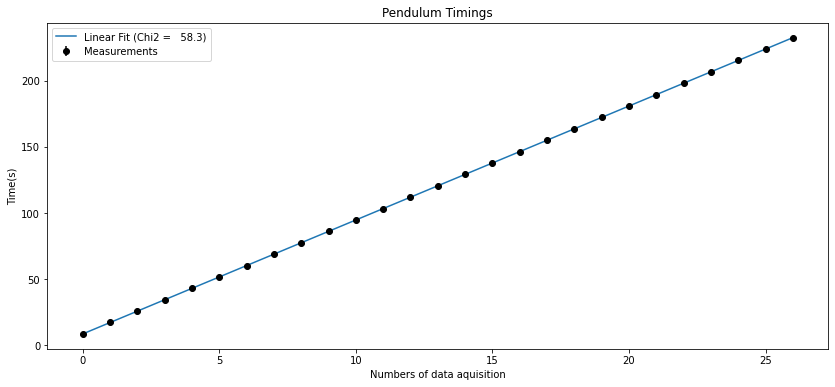

In [152]:
t = timings.flatten() #somehow timings is a (26,1)
#print(len(t))
alpha0, alpha1 = Fit_timing(t)

The algebric mean of the residuals for [ 0.02223651  0.09950635  0.00847619  0.07544603 -0.04818413  0.02458571
  0.00675556  0.0056254   0.07349524 -0.02213492 -0.08626508 -0.11569524
 -0.0698254  -0.04055556  0.00071429 -0.13871587  0.06585397  0.06542381
 -0.05660635  0.04766349 -0.12296667  0.01540317 -0.10562698  0.03834286
  0.1503127   0.02788254  0.07885238] is: -0.00000000000377232402
Residuals fit value (fit) = mu = 0.03482 +/- 0.01361
Residuals fit value (fit) = sigma = 0.04757 +/- 0.02954


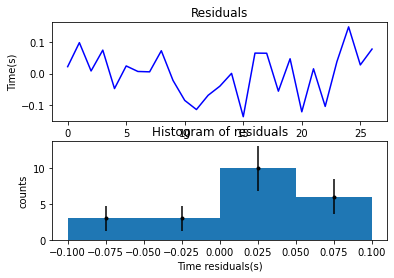

In [153]:

Test_time = []
Test_N = np.arange(len(t))
Nbins = 4
xmin = -0.1
xmax = 0.1
for i in range(len(t)):
  Test_time.append(Linear_fit(Test_N[i], alpha0, alpha1))
#print(Test_time)

Residuals = t - Test_time
Mean_R = Residuals.sum()/len(Residuals)
print(f'The algebric mean of the residuals for {Residuals} is: {Mean_R:.20f}')

def gauss_fit(x, mu,sigma):
  return 1/np.sqrt(2*np.pi)/sigma*np.exp(-0.5*(x-mu)**2/sigma**2)

fig2, ax2 = plt.subplots(nrows=2)

ax2[0].plot(Residuals, color='b')
ax2[0].set(xlabel="Data points", ylabel="Time(s)", title="Residuals")
histo = ax2[1].hist(Residuals, bins=Nbins, range=(xmin,xmax))

counts, bin_edges = np.histogram(Residuals, bins=Nbins, range=(xmin, xmax))
x = (bin_edges[1:][counts>0] + bin_edges[:-1][counts>0])/2
y = counts[counts>0]
sig_y = np.sqrt(counts[counts>0]) #error on bins Poisson distributed

ax2[1].errorbar(x, y, yerr=sig_y, xerr = 0.0, label='Resibuals with Poisson errors', fmt = '.k', ecolor = 'k')
ax2[1].set(xlabel= "Time residuals(s)",ylabel = "counts", title="Histogram of residuals")

Chi2_Res = Chi2Regression(gauss_fit, x, y, sig_y)

minuit_Regression = Minuit(Chi2_Res, mu = 0.1, sigma = 0.2 )
minuit_Regression.errordef = 1.0
minuit_Regression.migrad()

mu_fit, sigma_fit = minuit_Regression.values[:]

for name in minuit_Regression.parameters:
  print("Residuals fit value (fit) = {0} = {1:.5f} +/- {2:.5f}".format(name, minuit_Regression.values[name], minuit_Regression.errors[name]))





# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian (or have any obvious outliers), and from the Standard Deviation what your (typical) uncertainty is.

In [ ]:
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
  
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

In [ ]:
from sympy import *

g, L , T = symbols("g, L, T")
dg, dL, dT = symbols("sigma_g, sigma_L, sigma_T")

g = L * (2*pi / T)**2
dg = sqrt((g.diff(L) * dL)**2 + (g.diff(T) * dT)**2)
lprint(latex(Eq(symbols('g'),g)))
lprint(latex(Eq(symbols('sigma_g'), dg)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>